# Visualization of Datasets
**FIZ353 - Numerical Analysis | 16/10/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

It's always beneficial to check the data before and after we process it as it can offer some hidden relations or the picking of off values. Even though the `matplotlib` module offers elasticity, unfortunately it is not known for its practicality. Wrappers like the `seaborn` module provide functionality with ease.

# "El clasico"

Let's try to do it old way, using numpy & matplotlib. As we have observed in our previous lecture, since numpy arrays can not (by default) store elements of different types, our string timestamps are lost in import.

In [1]:
import numpy as np

data_np = np.genfromtxt("01_dataexport_20201008T180753.csv", delimiter=',',
                        filling_values=0.0,skip_header=10)
data_np

array([[ 0.       , 12.437169 , 59.       ,  0.       ],
       [ 0.       , 12.557169 , 63.       ,  0.       ],
       [ 0.       , 13.177169 , 68.       ,  0.       ],
       [ 0.       , 13.087169 , 76.       ,  0.       ],
       [ 0.       , 12.867169 , 81.       ,  0.       ],
       [ 0.       , 11.567169 , 88.       ,  0.       ],
       [ 0.       , 11.177169 , 90.       ,  0.       ],
       [ 0.       , 12.187169 , 87.       ,  0.       ],
       [ 0.       , 13.797169 , 78.       ,  0.       ],
       [ 0.       , 14.967169 , 72.       ,  0.       ],
       [ 0.       , 16.787169 , 62.       ,  0.       ],
       [ 0.       , 18.367168 , 55.       ,  0.       ],
       [ 0.       , 20.957169 , 41.       ,  0.       ],
       [ 0.       , 22.057169 , 36.       ,  0.       ],
       [ 0.       , 22.857168 , 33.       ,  0.       ],
       [ 0.       , 23.527168 , 29.       ,  0.       ],
       [ 0.       , 23.40717  , 28.       ,  0.       ],
       [ 0.       , 22.687168 ,

In [2]:
data_np.shape

(192, 4)

We're going to implement meaningful indexes as the first column, by joining the day index with the hour - mind that this wouldn't be too productive if we had more than 10 days (and why is that? and how would you fix it?)

In [3]:
for d in range(1,11):
    for h in range(0,12):
        print("1{:02d}{:02d}".format(d,h))

10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011


In [4]:
i = 0
for d in range(1,9):
    for h in range(0,24):
        data_np[i,0] = "{:d}{:02d}".format(d,h)
        i += 1
data_np

array([[100.       ,  12.437169 ,  59.       ,   0.       ],
       [101.       ,  12.557169 ,  63.       ,   0.       ],
       [102.       ,  13.177169 ,  68.       ,   0.       ],
       [103.       ,  13.087169 ,  76.       ,   0.       ],
       [104.       ,  12.867169 ,  81.       ,   0.       ],
       [105.       ,  11.567169 ,  88.       ,   0.       ],
       [106.       ,  11.177169 ,  90.       ,   0.       ],
       [107.       ,  12.187169 ,  87.       ,   0.       ],
       [108.       ,  13.797169 ,  78.       ,   0.       ],
       [109.       ,  14.967169 ,  72.       ,   0.       ],
       [110.       ,  16.787169 ,  62.       ,   0.       ],
       [111.       ,  18.367168 ,  55.       ,   0.       ],
       [112.       ,  20.957169 ,  41.       ,   0.       ],
       [113.       ,  22.057169 ,  36.       ,   0.       ],
       [114.       ,  22.857168 ,  33.       ,   0.       ],
       [115.       ,  23.527168 ,  29.       ,   0.       ],
       [116.       ,  23

...and here comes the basic plot:

In [5]:
import matplotlib.pyplot as plt

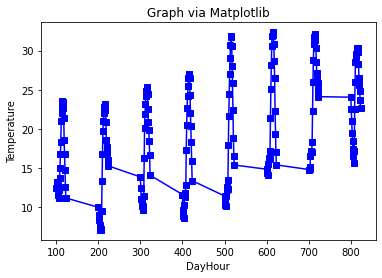

In [6]:
plt.plot(data_np[:,0],data_np[:,1],"b-s")
plt.title("Graph via Matplotlib")
plt.xlabel("DayHour")
plt.ylabel("Temperature")
plt.show()

## Importing a CSV file with Pandas

Now that we have experienced the pains of the "old" method, let's revive the technique we have acquired last week: using `Pandas` to hold the data in a dataframe!

In [7]:
import pandas as pd
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
data1 = pd.read_csv("01_dataexport_20201008T180753.csv",
                                         skiprows=9)
data1.columns = ['Timestamp','Temperature','Relative Humidity','Precipitation Total']
data1 = data1.set_index('Timestamp')
data1

,Temperature,Relative Humidity,Precipitation Total
Timestamp,,,
20201001T0000,12.437169,59.0,0.0
20201001T0100,12.557169,63.0,0.0
20201001T0200,13.177169,68.0,0.0
20201001T0300,13.087169,76.0,0.0
20201001T0400,12.867169,81.0,0.0
...,...,...,...
20201008T1900,26.437168,20.0,0.0
20201008T2000,25.567170,21.0,0.0
20201008T2100,24.777168,22.0,0.0


Even though, it is completely possible to plot dataframe using `matplotlib` there's actually a much better way to do it: enter the `seaborn` module!

In [8]:
import seaborn as sns
sns.set_theme() # To make things appear "more beautiful" 8)

In [9]:
# %matplotlib notebook

In [10]:
data1.loc[:,"Precipitation Total"].max()

0.0

Here, it's as simple as it gets! We are just letting seaborne to figure out what we need:

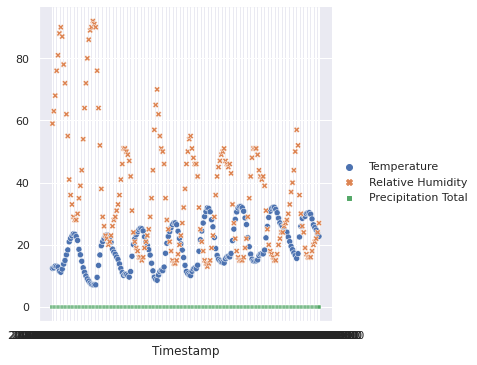

In [11]:
plt1 = sns.relplot(data=data1)

## Plotting a specific column
We can easily designate columns to be used for the x & y parameters for our graph:

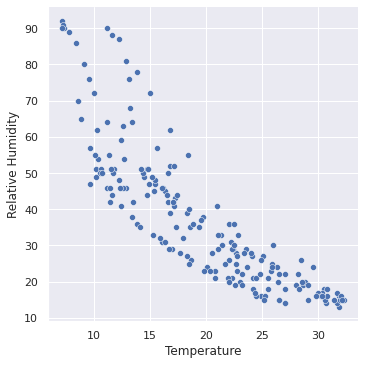

In [12]:
plt2 = sns.relplot(data=data1,x="Temperature",y="Relative Humidity")

And here is a beauty: by `hue` and `size` parameters, we can classify using other column values, making it easier to investigate the dependencies wrt these columns:

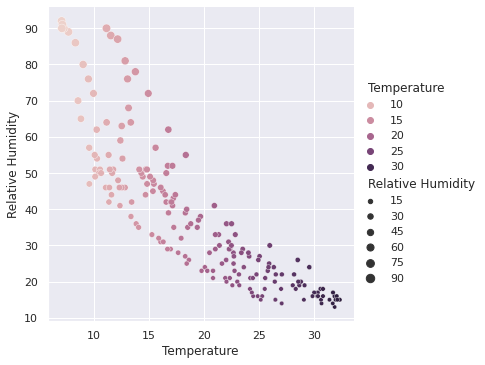

In [13]:
plt3 = sns.relplot(data=data1,x="Temperature",y="Relative Humidity",
                  hue="Temperature",size="Relative Humidity")

And this is our attempt to further classify things by adding the `style` alas it kind of fails

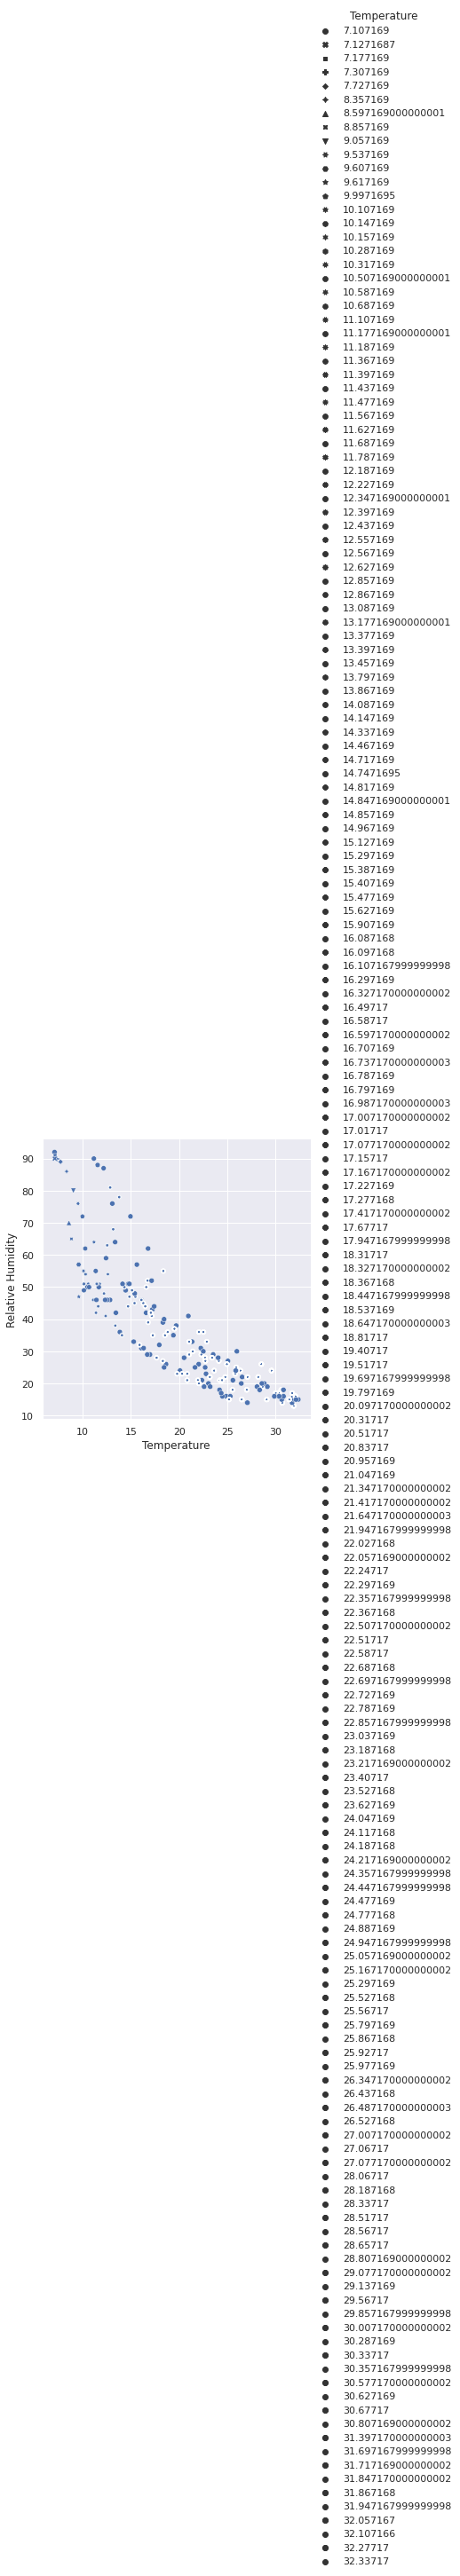

In [14]:
plt3 = sns.relplot(data=data1,x="Temperature",y="Relative Humidity",
                  style="Temperature")

Seems that it doesn't like so many classification wrt the values. Luckily we can work around it, by _smoothing_ things out! 8)

In [15]:
import numpy as np

In [16]:
data1

,Temperature,Relative Humidity,Precipitation Total
Timestamp,,,
20201001T0000,12.437169,59.0,0.0
20201001T0100,12.557169,63.0,0.0
20201001T0200,13.177169,68.0,0.0
20201001T0300,13.087169,76.0,0.0
20201001T0400,12.867169,81.0,0.0
...,...,...,...
20201008T1900,26.437168,20.0,0.0
20201008T2000,25.567170,21.0,0.0
20201008T2100,24.777168,22.0,0.0


In [17]:
print("T_min: {:.6f}C | T_max: {:.3f}C"
      .format(data1.Temperature.min(),data1.Temperature.max()))

T_min: 7.107169C | T_max: 32.337C


In [18]:
data1[data1.Temperature == data1.Temperature.min()]

,Temperature,Relative Humidity,Precipitation Total
Timestamp,,,
20201002T0500,7.107169,92.0,0.0


In [19]:
print(data1.index[data1.Temperature==data1.Temperature.min()][0])

20201002T0500


In [20]:
data1.Temperature/10

Timestamp
20201001T0000    1.243717
20201001T0100    1.255717
20201001T0200    1.317717
20201001T0300    1.308717
20201001T0400    1.286717
                   ...   
20201008T1900    2.643717
20201008T2000    2.556717
20201008T2100    2.477717
20201008T2200    2.362717
20201008T2300    2.272717
Name: Temperature, Length: 192, dtype: float64

In [21]:
np.floor(data1.Temperature / 10.0) * 10

Timestamp
20201001T0000    10.0
20201001T0100    10.0
20201001T0200    10.0
20201001T0300    10.0
20201001T0400    10.0
                 ... 
20201008T1900    20.0
20201008T2000    20.0
20201008T2100    20.0
20201008T2200    20.0
20201008T2300    20.0
Name: Temperature, Length: 192, dtype: float64

In [22]:
data1.Temperature

Timestamp
20201001T0000    12.437169
20201001T0100    12.557169
20201001T0200    13.177169
20201001T0300    13.087169
20201001T0400    12.867169
                   ...    
20201008T1900    26.437168
20201008T2000    25.567170
20201008T2100    24.777168
20201008T2200    23.627169
20201008T2300    22.727169
Name: Temperature, Length: 192, dtype: float64

Here we add a new column `TempFloor` that stores the smoothed out temperature values:

In [23]:
data1['TempFloored'] = np.floor(data1.Temperature / 10.0) * 10

In [24]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored
Timestamp,,,,
20201001T0000,12.437169,59.0,0.0,10.0
20201001T0100,12.557169,63.0,0.0,10.0
20201001T0200,13.177169,68.0,0.0,10.0
20201001T0300,13.087169,76.0,0.0,10.0
20201001T0400,12.867169,81.0,0.0,10.0
...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0
20201008T2000,25.567170,21.0,0.0,20.0
20201008T2100,24.777168,22.0,0.0,20.0


and voilà!

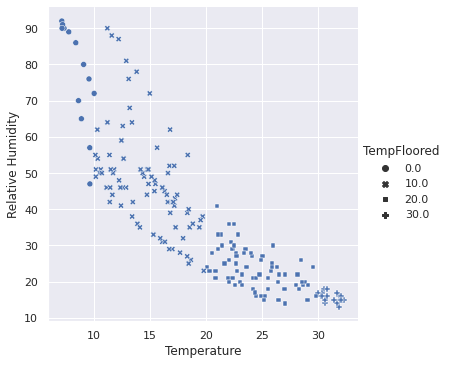

In [25]:
plt4 = sns.relplot(data=data1,x="Temperature",y="Relative Humidity",
                  style="TempFloored")

Enough with the scatter plots, lets connect the dots with the `kind` parameter:

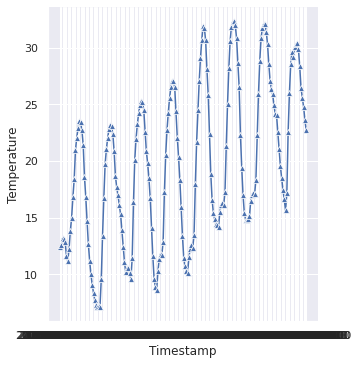

In [26]:
plt4 = sns.relplot(data=data1,x="Timestamp",y="Temperature", kind="line", marker="^")

Here is the same thing without the markers:

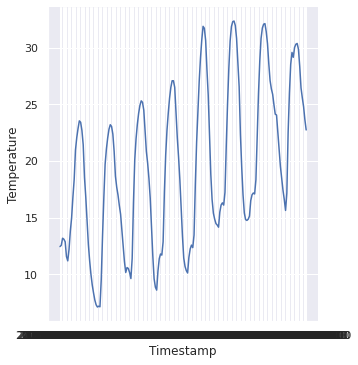

In [27]:
plt4_2 = sns.relplot(data=data1,x="Timestamp",y="Temperature", kind="line")

In [28]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored
Timestamp,,,,
20201001T0000,12.437169,59.0,0.0,10.0
20201001T0100,12.557169,63.0,0.0,10.0
20201001T0200,13.177169,68.0,0.0,10.0
20201001T0300,13.087169,76.0,0.0,10.0
20201001T0400,12.867169,81.0,0.0,10.0
...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0
20201008T2000,25.567170,21.0,0.0,20.0
20201008T2100,24.777168,22.0,0.0,20.0


Let's further classify such that those entries with their humidity above the mean value will be labeled as "humid", whereas those below will be "dry". 

Therefore, we have to start with calculating the mean:

In [29]:
data1["Relative Humidity"].mean()

37.390625

and we define a new column for the job:

In [30]:
data1['RHClass'] = 0

In [31]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored,RHClass
Timestamp,,,,,
20201001T0000,12.437169,59.0,0.0,10.0,0
20201001T0100,12.557169,63.0,0.0,10.0,0
20201001T0200,13.177169,68.0,0.0,10.0,0
20201001T0300,13.087169,76.0,0.0,10.0,0
20201001T0400,12.867169,81.0,0.0,10.0,0
...,...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0,0
20201008T2000,25.567170,21.0,0.0,20.0,0
20201008T2100,24.777168,22.0,0.0,20.0,0


How do we single out the ones that have their humidity above the average? By filtering of course! 8)

In [32]:
mask = data1['Relative Humidity']>37

In [33]:
data1.loc[mask,'RHClass']

Timestamp
20201001T0000    0
20201001T0100    0
20201001T0200    0
20201001T0300    0
20201001T0400    0
                ..
20201008T0400    0
20201008T0500    0
20201008T0600    0
20201008T0700    0
20201008T0800    0
Name: RHClass, Length: 83, dtype: int64

In [34]:
mask

Timestamp
20201001T0000     True
20201001T0100     True
20201001T0200     True
20201001T0300     True
20201001T0400     True
                 ...  
20201008T1900    False
20201008T2000    False
20201008T2100    False
20201008T2200    False
20201008T2300    False
Name: Relative Humidity, Length: 192, dtype: bool

In [35]:
np.invert(mask)

Timestamp
20201001T0000    False
20201001T0100    False
20201001T0200    False
20201001T0300    False
20201001T0400    False
                 ...  
20201008T1900     True
20201008T2000     True
20201008T2100     True
20201008T2200     True
20201008T2300     True
Name: Relative Humidity, Length: 192, dtype: bool

So, we fill the 'RHClass' column of the ones above the mean with "humid"; and with "dry" for the others (please observe how we invert the booleans with the "invert").

In [36]:
data1.loc[mask,'RHClass'] = 'humid'
data1.loc[np.invert(mask),'RHClass'] = 'dry'

In [37]:
data1

,Temperature,Relative Humidity,Precipitation Total,TempFloored,RHClass
Timestamp,,,,,
20201001T0000,12.437169,59.0,0.0,10.0,humid
20201001T0100,12.557169,63.0,0.0,10.0,humid
20201001T0200,13.177169,68.0,0.0,10.0,humid
20201001T0300,13.087169,76.0,0.0,10.0,humid
20201001T0400,12.867169,81.0,0.0,10.0,humid
...,...,...,...,...,...
20201008T1900,26.437168,20.0,0.0,20.0,dry
20201008T2000,25.567170,21.0,0.0,20.0,dry
20201008T2100,24.777168,22.0,0.0,20.0,dry


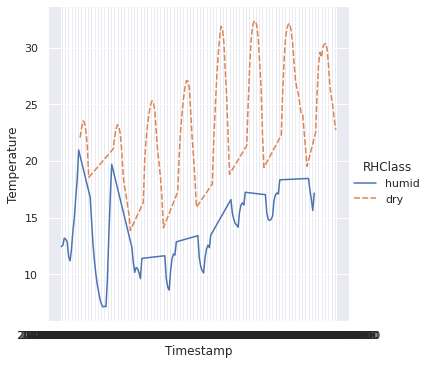

In [38]:
plt5 = sns.relplot(data=data1,x="Timestamp",y="Temperature", kind="line", 
                   style="RHClass", hue="RHClass")

Text(0.5, 0.98, 'Test Graph')

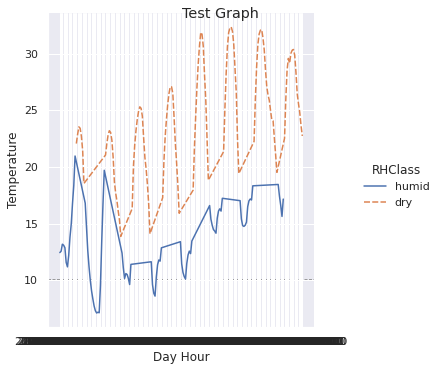

In [39]:
(plt5.map(plt.axhline,y = 10, color=".5", dashes=(2, 1), zorder=0)
.set_axis_labels("Day Hour", "Temperature")
.fig.suptitle("Test Graph"))

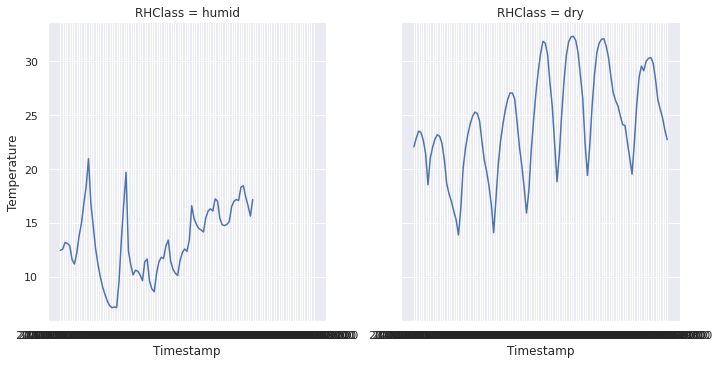

In [40]:
plt5 = sns.relplot(data=data1,x="Timestamp", y="Temperature", kind="line", 
                   col="RHClass")

## Histogram Plots
Histogram bars are also essential - especially if we are dealing with distributions. 

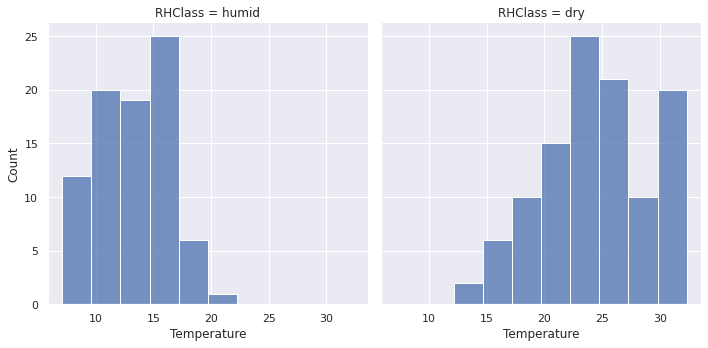

In [41]:
plt6 = sns.displot(data=data1,x="Temperature",col="RHClass",bins=10)

In [42]:
data_g = np.random.normal(0,10,1000)

In [43]:
data_g

array([ 1.29214839e+01,  3.11250426e+00,  4.98860717e+00, -1.02919357e+01,
        6.95793706e+00, -5.83862111e-01, -2.71621718e+00, -1.75557195e+01,
        7.36372536e+00, -3.01969369e+00, -5.36183781e+00,  3.23317867e+00,
       -1.08758331e+01, -8.46357758e+00,  9.89833578e+00,  2.32960559e+00,
        4.89820218e+00, -9.51853523e+00,  3.41315422e+00, -6.88578734e+00,
        9.88186172e+00, -9.10586434e+00, -1.51792162e+01,  1.65601723e+01,
        1.02973801e+01, -8.51137145e+00, -6.32783473e+00, -2.16983381e+01,
        6.84518165e+00, -3.17306807e+00, -5.40272612e+00, -1.26630153e+01,
        1.73628588e+00, -2.40413028e+00, -4.32792410e-02, -1.19375351e+01,
        1.35342306e+00,  3.06829291e-01, -2.49292705e+01,  1.63339132e+01,
        1.67687359e+00,  9.55044463e+00,  8.35415532e+00, -8.99642703e+00,
        1.33308198e+00,  4.57502471e+00,  5.37919608e+00, -5.24965027e+00,
        2.59471284e+00,  1.33780670e+01, -3.19497388e+00,  5.30361837e+00,
       -6.55228625e-01, -

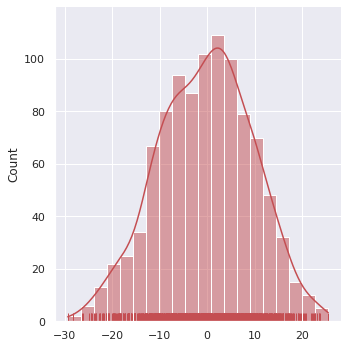

In [44]:
sns.displot(data_g,bins=20,color="r",kde=True,rug=True,)